✅ Heart Disease Dataset Loaded
   Age  Sex  Cholesterol  BloodPressure  HeartRate  Smoking  Diabetes  \
0   68    1        286.8          140.2      128.8        0         0   
1   58    1        273.2          142.8      160.6        0         0   
2   44    1        338.8          140.8      108.5        1         0   
3   72    1        338.9          124.1      152.5        1         0   
4   37    1        323.4          120.4      110.6        1         1   

   ExerciseLevel  HeartDisease  
0              4             1  
1              5             1  
2              8             0  
3              9             0  
4              8             1  

Binary Classifier (Heart Disease vs No Disease)
------------------------------------------------
Accuracy:  0.9167
Precision: 0.9211
Recall:    0.9459
F1-score:  0.9333
ROC-AUC:   0.9788

Confusion Matrix:
[[20  3]
 [ 2 35]]


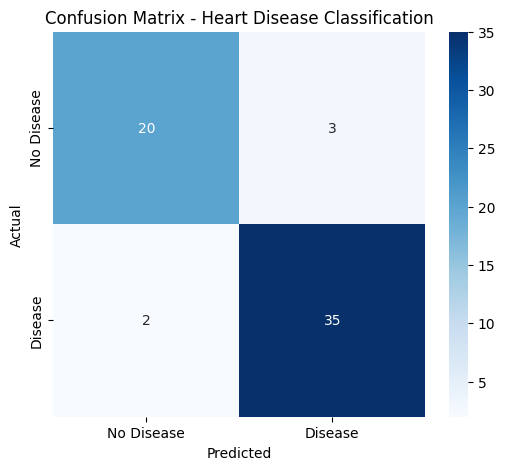

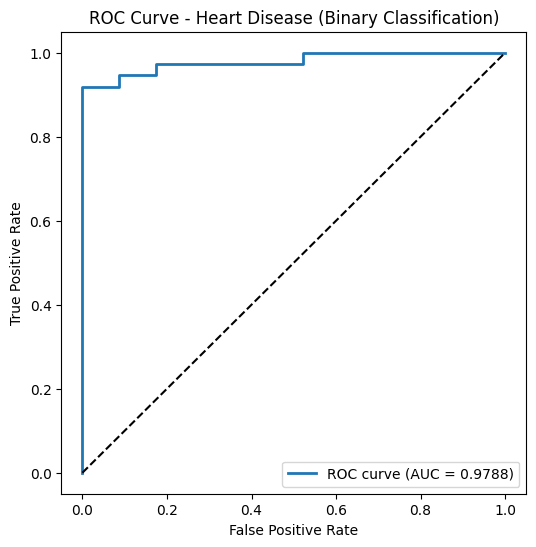

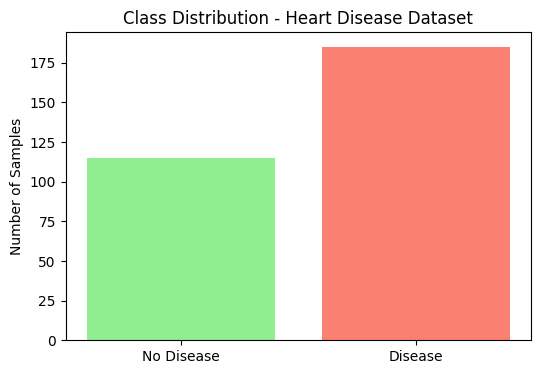

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    f1_score, confusion_matrix, roc_auc_score, roc_curve
)

# 1. Load heart disease dataset
df = pd.read_csv("heart_disease_dataset.csv")
print("✅ Heart Disease Dataset Loaded")
print(df.head())

# 2. Features (X) and target (y)
X = df.drop(columns=["HeartDisease"]).values
y = df["HeartDisease"].values       # 1 = Disease, 0 = No Disease

# 3. Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# 4. Scale features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 5. Train Logistic Regression
clf = LogisticRegression(max_iter=1000, solver='lbfgs')
clf.fit(X_train, y_train)

# 6. Predictions and probabilities
y_pred = clf.predict(X_test)
y_prob = clf.predict_proba(X_test)[:, 1]

# 7. Metrics
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_prob)
cm = confusion_matrix(y_test, y_pred)

print("\nBinary Classifier (Heart Disease vs No Disease)")
print("------------------------------------------------")
print(f"Accuracy:  {acc:.4f}")
print(f"Precision: {prec:.4f}")
print(f"Recall:    {rec:.4f}")
print(f"F1-score:  {f1:.4f}")
print(f"ROC-AUC:   {roc_auc:.4f}")
print("\nConfusion Matrix:")
print(cm)

# 8. Confusion Matrix Heatmap
plt.figure(figsize=(6,5))
sns.heatmap(
    cm,
    annot=True,
    fmt='d',
    cmap='Blues',
    xticklabels=["No Disease", "Disease"],
    yticklabels=["No Disease", "Disease"]
)
plt.title("Confusion Matrix - Heart Disease Classification")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# 9. ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.figure(figsize=(6,6))
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc:.4f})', linewidth=2)
plt.plot([0,1], [0,1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Heart Disease (Binary Classification)')
plt.legend(loc='lower right')
plt.show()

# 10. Class Distribution Bar Chart
unique, counts = np.unique(y, return_counts=True)
plt.figure(figsize=(6,4))
plt.bar(["No Disease", "Disease"], counts, color=["lightgreen", "salmon"])
plt.title("Class Distribution - Heart Disease Dataset")
plt.ylabel("Number of Samples")
plt.show()
